<a href="https://colab.research.google.com/github/TanmayDhar36/Transfer-EDA-To-Dashboard/blob/main/Capstone_Project_Transform_EDA_to_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Transform EDA to Dashboard**

**Project Type** - EDA to Dashboard

**Contribution** - Individual

**Author** - Tanmay Dhar

# **Project Summary**

The objective of this project is to perform an exploratory data analysis (EDA) on Play Store data using Tableau, with the aim of gaining insights into user sentiments, overall app performance, and areas for improvement. By summarizing the project in this way, we can effectively go through into user feedback, app ratings, and other relevant data which can help us to data-driven decisions for enhancing the app's user experience and market competitiveness.

# **Problem Statement**

In a highly competitive mobile app market, it is essential for developers and businesses to understand user feedback and app performance to make data-driven decisions. The problem is that there is a vast amount of unstructured user reviews and ratings on the Google Play Store, and extracting meaningful insights from this data is challenging. This project seeks to address this problem by leveraging Tableau to analyze user reviews, ratings, and related data to provide actionable insights for improving app performance and user satisfaction.

#### **Define Your Business Objective?**

Create Stunning Tableau Dashboard from the same dataset on which EDA was performed for the capstone project. Which will give us meaningful insights.

# **Let's Begin !**

In [ ]:
# Import Libraries numpy, pandas, seaborn and metlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

In [ ]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the the Play Store data and User Reviews data from csv files
play_store_data = pd.read_csv('/content/drive/MyDrive/Data Sets/Play Store Data.csv')
user_reviews = pd.read_csv('/content/drive/MyDrive/Data Sets/User Reviews.csv')


**Play Store Data Cleaning & Preprocess**

In [ ]:
play_store_data.head().style.background_gradient(cmap ="Pastel1")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# dataset columns
play_store_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Checking number of rows & column
play_store_data.shape

(10841, 13)

In [ ]:
# Data Sets Info
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Checking Douplicates
play_store_data.duplicated().sum()

483

In [ ]:
# Drop Duplicates
play_store_data.drop_duplicates(subset = 'App', inplace = True)

In [ ]:
play_store_data.duplicated().sum()

0

In [ ]:
# Checking Null Values or Missing values
play_store_data.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

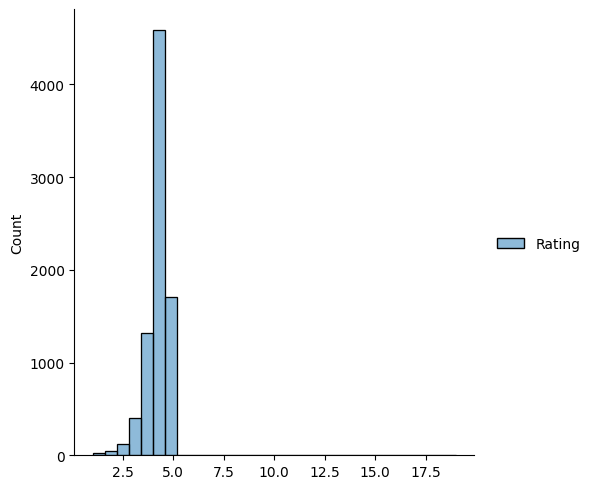

In [ ]:
# Checking outliers
sns.displot(play_store_data, bins=30);

The Chart Below Shows The Count Of Missing Values


<Axes: >

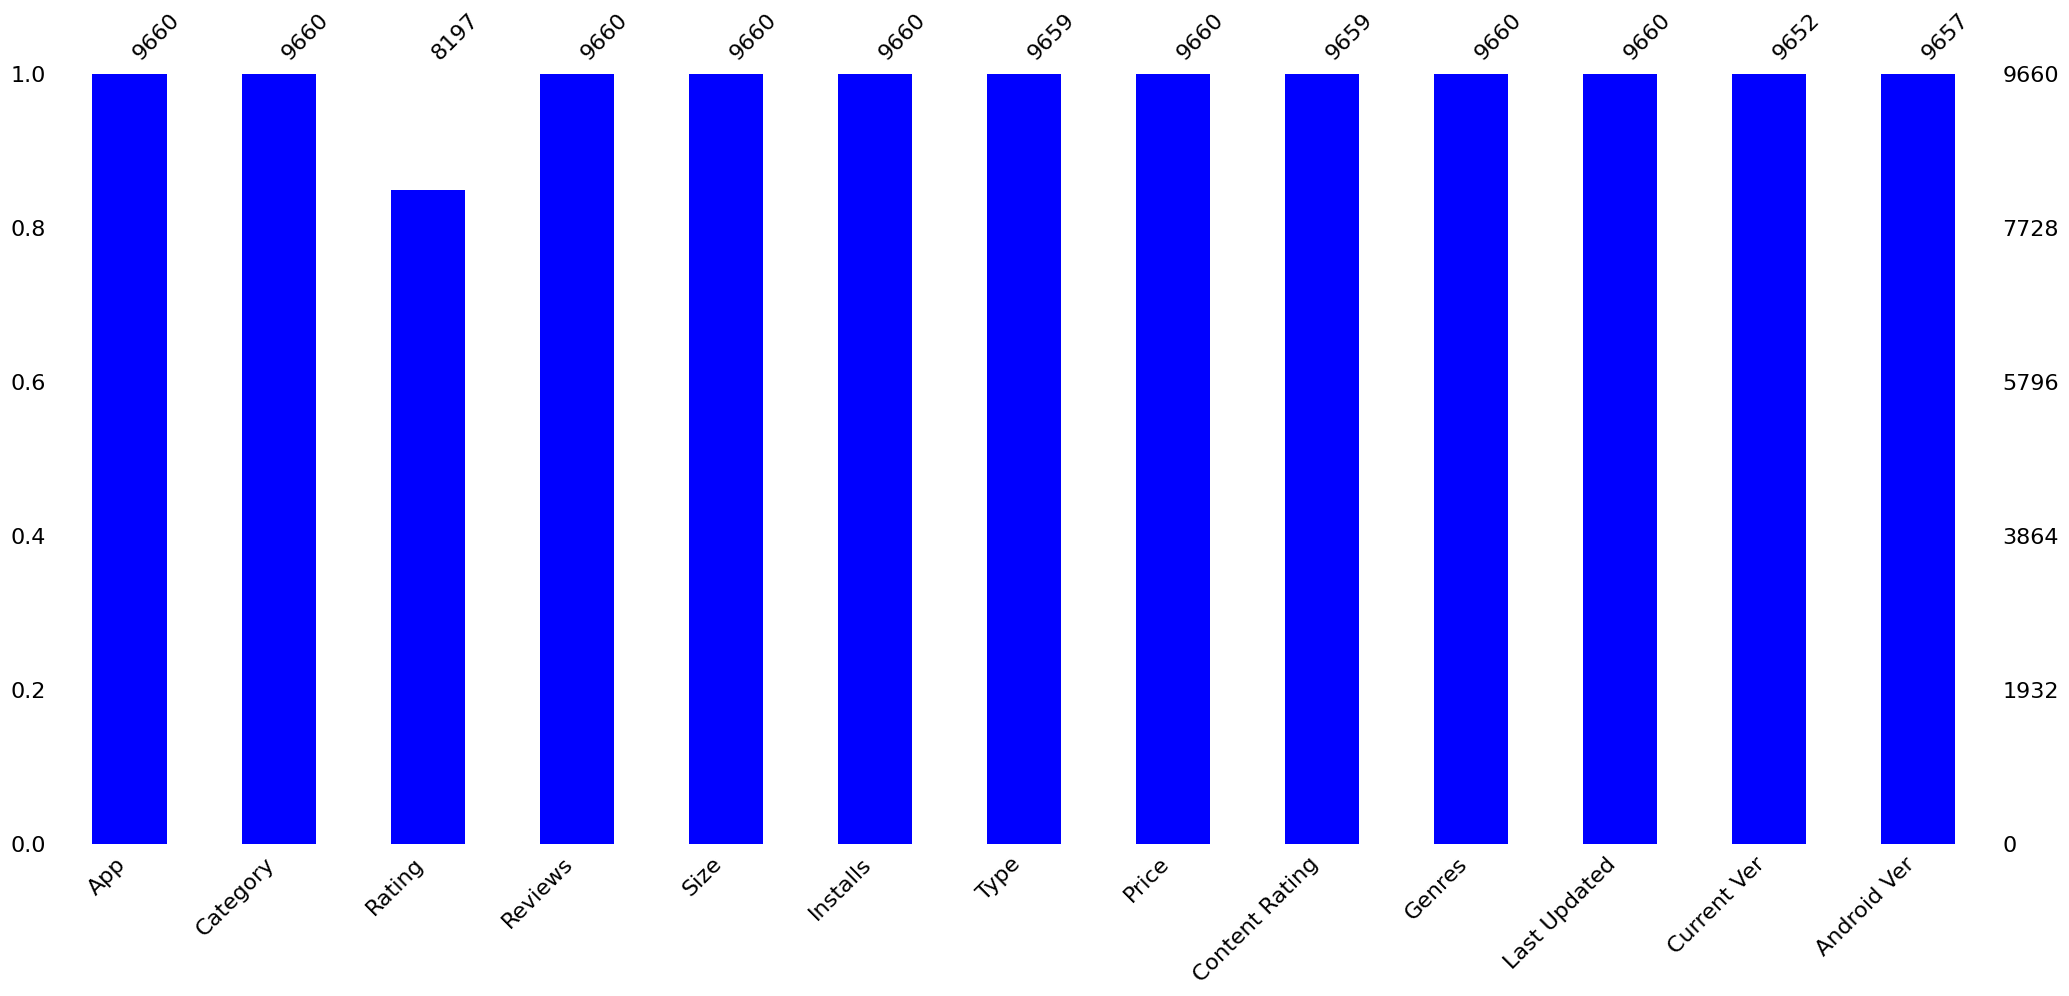

In [ ]:
# Visualize the missing Values
print('The Chart Below Shows The Count Of Missing Values')
msno.bar(play_store_data,color='Blue')

In [ ]:
# Describe
play_store_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,8197.0,4.175052,0.561026,1.0,4.0,4.3,4.5,19.0


In [ ]:
# Impute the missing values for numerical columns with their mean
play_store_data.fillna(play_store_data.mean(), inplace=True)

<ipython-input-186-d5bb7134abf2>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  play_store_data.fillna(play_store_data.mean(), inplace=True)


In [ ]:
# Dropping the rows with null values
play_store_data.dropna(inplace=True)

In [ ]:
#Checking is there any null values or missing after dropping
play_store_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# Save the cleaned dataset
play_store_data.to_csv('/content/drive/MyDrive/Play_Store_Data_.csv', index=False)

**User Review Data Cleaning & Preprocess**

In [ ]:
user_reviews.head().style.background_gradient(cmap ="Pastel1")

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,nan,nan,nan,nan
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000


In [ ]:
# dataset columns
user_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
# Checking number of rows & column
user_reviews.shape

(64295, 5)

In [ ]:
# Data Sets Info
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# Checking Douplicates
user_reviews.duplicated().sum()

33616

In [ ]:
# Drop Duplicates
user_reviews.drop_duplicates(subset = 'App', inplace = True)

In [ ]:
#Again Checking Douplicates
user_reviews.duplicated().sum()

0

In [ ]:
# Checking Null Values or Missing values
user_reviews.isna().sum()

App                         0
Translated_Review         433
Sentiment                 433
Sentiment_Polarity        433
Sentiment_Subjectivity    433
dtype: int64

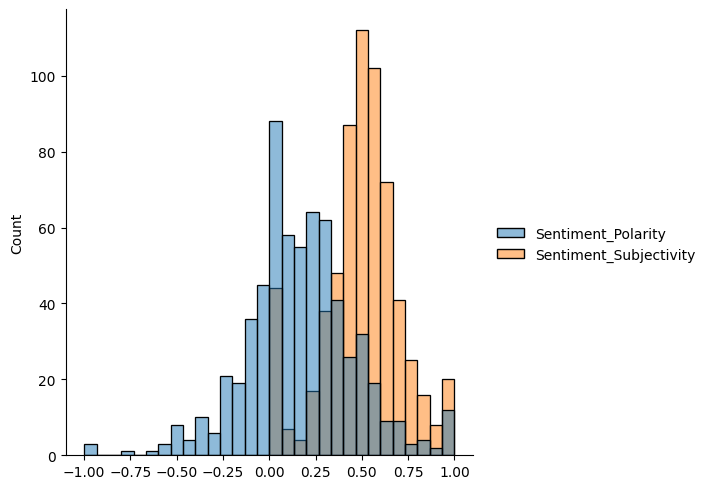

In [ ]:
# Checking outliers using disploy
sns.displot(user_reviews, bins=30);

The Chart Below Shows The Count Of Missing Values


<Axes: >

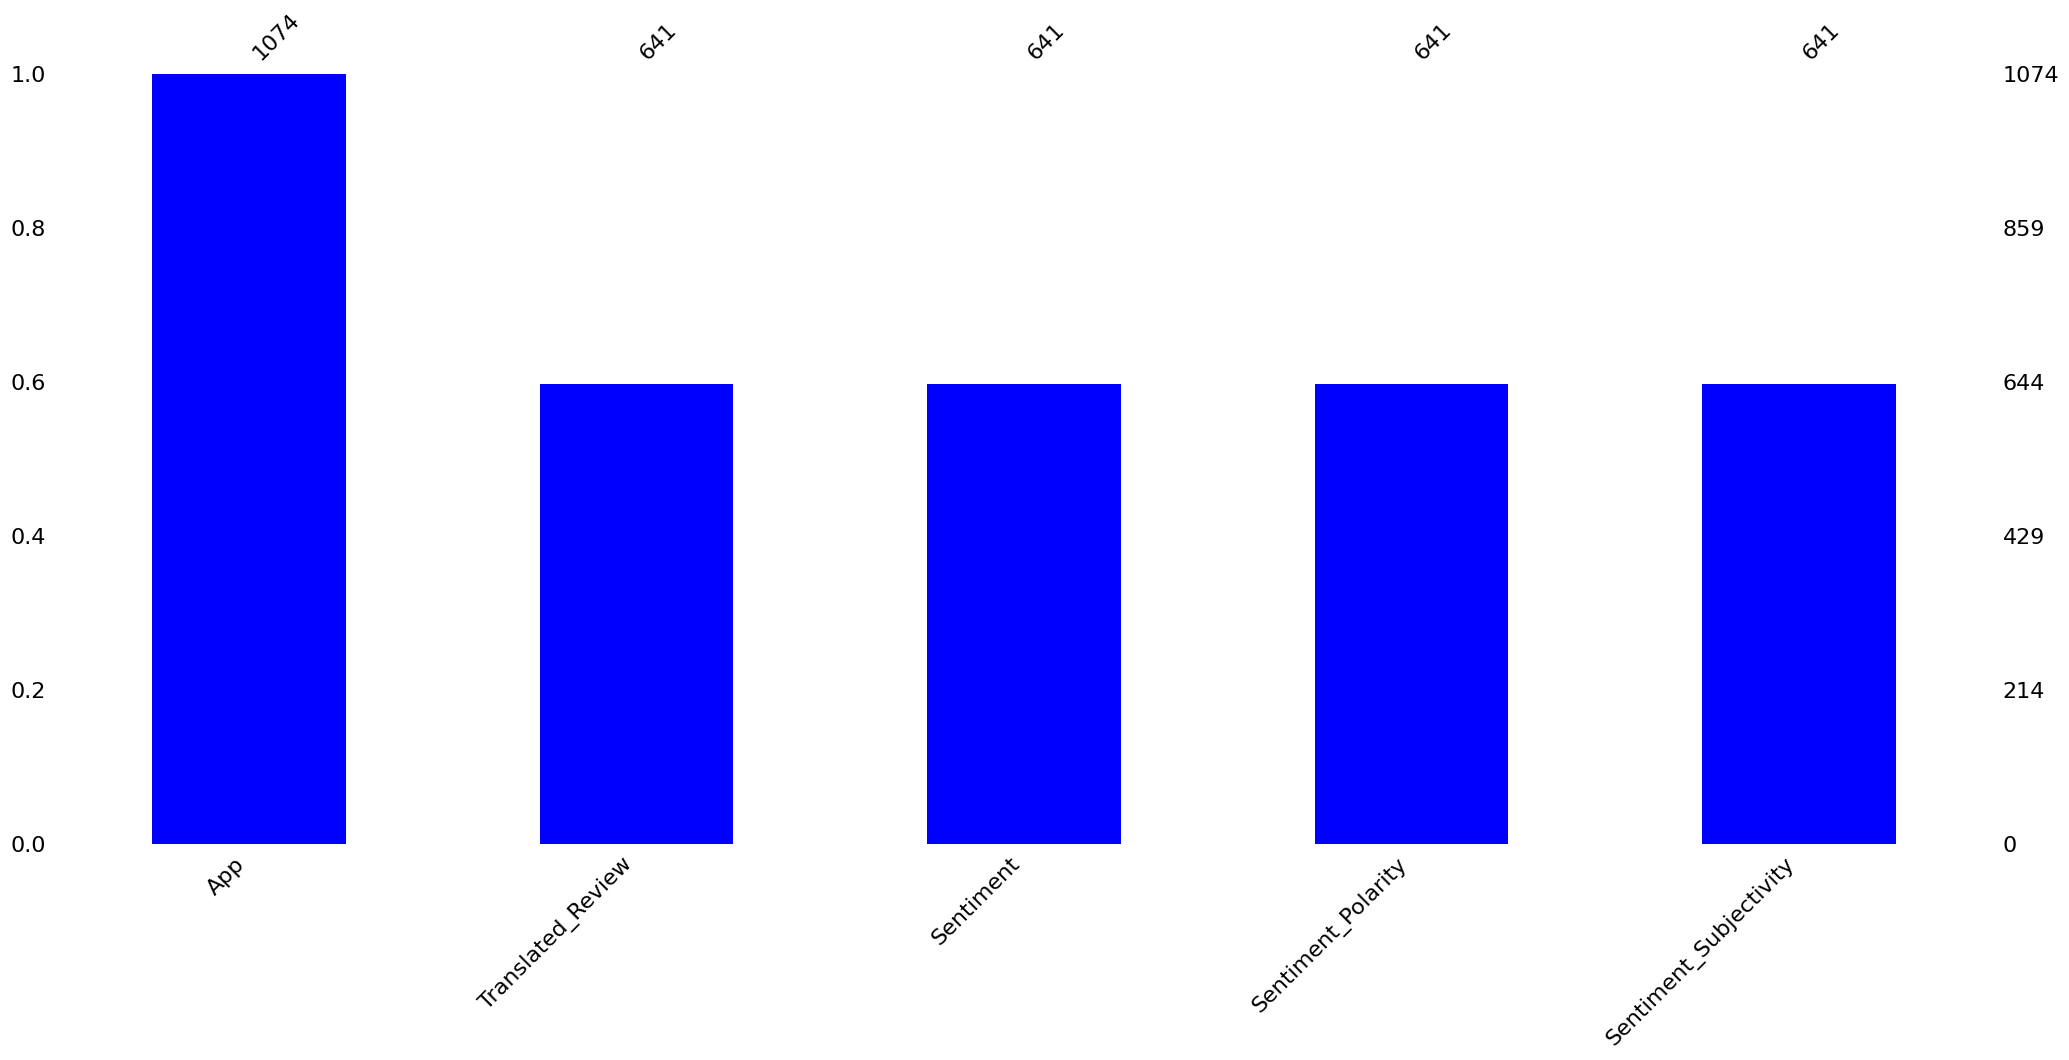

In [ ]:
# Visualize the missing Values
print('The Chart Below Shows The Count Of Missing Values')
msno.bar(user_reviews,color='Blue')

In [ ]:
# Describe
user_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
Sentiment_Polarity,641.0,0.160982,0.297465,-1.0,0.0,0.151515,0.328333,1.0
Sentiment_Subjectivity,641.0,0.497001,0.213921,0.0,0.4,0.501852,0.614626,1.0


In [ ]:
# Impute the missing values for numerical columns with their mean
user_reviews.fillna(user_reviews.mean(), inplace=True)

<ipython-input-202-e52afb18c13a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  user_reviews.fillna(user_reviews.mean(), inplace=True)


In [ ]:
# Dropping the rows with null values
user_reviews.dropna(inplace=True)

In [ ]:
#Checking is there any null values or missing after dropping
play_store_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# Save the cleaned dataset
user_reviews.to_csv('/content/drive/MyDrive/User_Review_Data_.csv', index=False)

# **Project Link**

https://public.tableau.com/app/profile/tanmay.dhar3211/viz/PlayStoreAppReviewAnalysis_16993445307150/PlayStoreAppReviewAnalysis?publish=yes

# **Project Image**

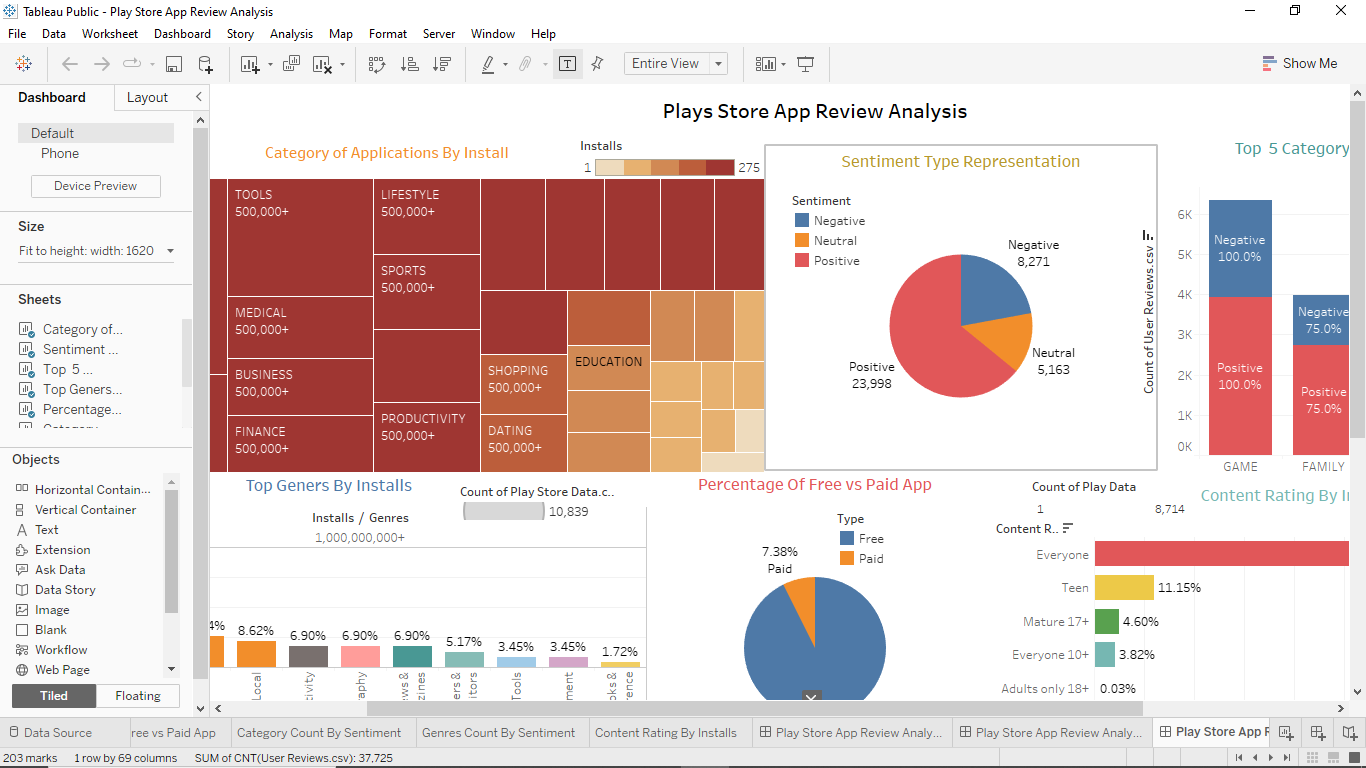

# **Video Link**

https://drive.google.com/file/d/1CB3FA_KsKoTSlAgbs4o52XeSGcyEqjrh/view?usp=drive_link

# **Conclusion**

In conclusion, this project has provided a comprehensive view of user sentiment, trends, and areas for improvement for the analyzed app on the Google Play Store. By acting on the recommendations and continuing to monitor user feedback, developers can strive for ongoing app enhancement and greater user satisfaction, ultimately leading to a more successful and popular app.